In [5]:
#Allow matplotlib to plot inside this notebook

%matplotlib inline

In [6]:
import os
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display,HTML
from scipy.stats import norm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras import backend

Using TensorFlow backend.


In [7]:
#Read in data

data=pd.read_csv('Black_Scholes_Training_Data.csv')

In [8]:
#Normalize spot and call prices for test and training sets

data['# Stock_Price']=data['# Stock_Price']/data[' Strike_Price']
data[' Call_Price']=data[' Call_Price']/data[' Strike_Price']

In [9]:
#Partition data into training and test sets. We are using a 80/20 split

n=300000
n_train=int(0.8*n)
train=data[0:n_train]
X_train=train[['# Stock_Price', ' Maturity', ' Dividend_rate', ' Volatility', ' Risk_Free_Rate']].values
y_train = train[' Call_Price'].values
test=data[n_train+1:n]
X_test=test[['# Stock_Price', ' Maturity', ' Dividend_rate', ' Volatility', ' Risk_Free_Rate']].values
y_test=test[' Call_Price'].values

In [10]:
#Define custom activation function

def custom_activation(x):
    return backend.exp(x)

In [11]:
#Set up, compile and fit the model
    
nodes = 120
model =Sequential()

In [12]:
#Add four hidden layers and define activation function for each

model.add(Dense(nodes, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation(custom_activation))

In [13]:
#Compile model with loss function to minimize and optimize

model.compile(loss='mse', optimizer='rmsprop')

In [14]:
#Train model 

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Train on 216000 samples, validate on 24000 samples
Epoch 1/10
216000/216000 [==============================] - 7s 32us/step - loss: 16445.5834 - val_loss: 15.9842
Epoch 2/10
216000/216000 [==============================] - 7s 32us/step - loss: 436373.8286 - val_loss: 13.4812
Epoch 3/10
216000/216000 [==============================] - 7s 31us/step - loss: 646.7941 - val_loss: 0.5445
Epoch 4/10
216000/216000 [==============================] - 7s 31us/step - loss: 4.8585 - val_loss: 0.6512
Epoch 5/10
216000/216000 [==============================] - 7s 31us/step - loss: 2.4680 - val_loss: 0.5258
Epoch 6/10
216000/216000 [==============================] - 7s 31us/step - loss: 2.2444 - val_loss: 0.4378
Epoch 7/10
216000/216000 [==============================] - 7s 31us/step - loss: 2.0007 - val_loss: 0.4530
Epoch 8/10
216000/216000 [==============================] - 7s 31us/step - loss: 1.8716 - val_loss: 0.5671
Epoch 9/10
216000/216000 [==============================] - 7s 31us/step - loss:

In [21]:
#Add HTML to the stats tables

%%HTML
<style type="text/css">
    table.td{
        height:50px;
    }
    table.dataframe td, table.dataframe th {
        border-style: solid
    }
</style>

In [22]:
#Define function to check accuracy of prediction

def CheckAccuracy(y,y_hat,y2,y_hat2):
    
    #Check accuracy for in sample prediction and plot graph
    
    stats=dict()
    stats['diff']=y-y_hat
    stats['mse']=np.mean(stats['diff']**2)
    stats['rmse']=np.sqrt(stats['mse'])
    stats['mae']=np.mean(abs(stats['diff']))
    stats['mpe']=np.sqrt(stats['mse'])/np.mean(y)
    
    d1 = {'Mean Squared Error': [stats['mse']], 'Root Mean Squared Error': [stats['rmse']], 'Mean Absolute Error': [stats['mae']],'Mean Percent Error': [stats['mpe']] }
    df1 = pd.DataFrame(data=d1)
    display(HTML('<h2> Summary statistics for in sample prediction</h2>'))
    table=display(HTML(df1.to_html()))

    
    mpl.rcParams['agg.path.chunksize']=10000
    fig1=plt.figure(figsize=(14,10))
    plt.scatter(y,y_hat,color='black', linewidth=0.3,alpha=0.4, s=0.5)
    plt.xlabel('Actual Price', fontsize=20, fontname='Times New Roman')
    plt.ylabel('Predicted Price', fontsize=20, fontname='Times New Roman')
    plt.show()
    
    #Check accuracy for out sample prediction and plot graph
    
    stats2=dict() 
    stats2['diff']=y2-y_hat2
    stats2['mse']=np.mean(stats2['diff']**2)
    stats2['rmse']=np.sqrt(stats2['mse'])
    stats2['mae']=np.mean(abs(stats2['diff']))
    stats2['mpe']=np.sqrt(stats2['mse'])/np.mean(y)
    
    d2 = {'Mean Squared Error': [stats2['mse']], 'Root Mean Squared Error': [stats2['rmse']], 'Mean Absolute Error': [stats2['mae']],'Mean Percent Error': [stats2['mpe']] }
    df2 = pd.DataFrame(data=d2)
    display(HTML('<h2> Summary statistics for out sample prediction</h2>'))
    display(HTML(df2.to_html()))
    
    mpl.rcParams['agg.path.chunksize']=10000
    fig2=plt.figure(figsize=(14,10))
    plt.scatter(y2,y_hat2,color='black', linewidth=0.3,alpha=0.4, s=0.5)
    plt.xlabel('Actual Price', fontsize=20, fontname='Times New Roman')
    plt.ylabel('Predicted Price', fontsize=20, fontname='Times New Roman')
    plt.show()
    
    return stats,stats2  

In [23]:
#Define function to plot histogram of call option pricing errors

def Plothistogram(stats_one,stats_two):
    
    #In sample
    
    fig=plt.figure(figsize=(14,10))
    plt.hist(stats['diff'], bins=50, range=[-0.05,0.10], edgecolor='black', color='white')
    plt.xticks(np.arange(-0.05,0.1,step=0.05))
    plt.ylabel('Density')
    plt.show()
    
    #Out sample
    
    fig2=plt.figure(figsize=(14,10))
    plt.hist(stats2['diff'], bins=50, range=[-0.05,0.10],edgecolor='black', color='white')
    plt.xticks(np.arange(-0.05,0.1,step=0.05))
    plt.ylabel('Density')
    plt.show()

In [24]:
#Predict call option price using training data 
    
y_train_hat=model.predict(X_train)
y_train_hat=np.squeeze(y_train_hat)

,Mean Absolute Error,Mean Percent Error,Mean Squared Error,Root Mean Squared Error
0,0.413141,0.826396,0.979738,0.989817


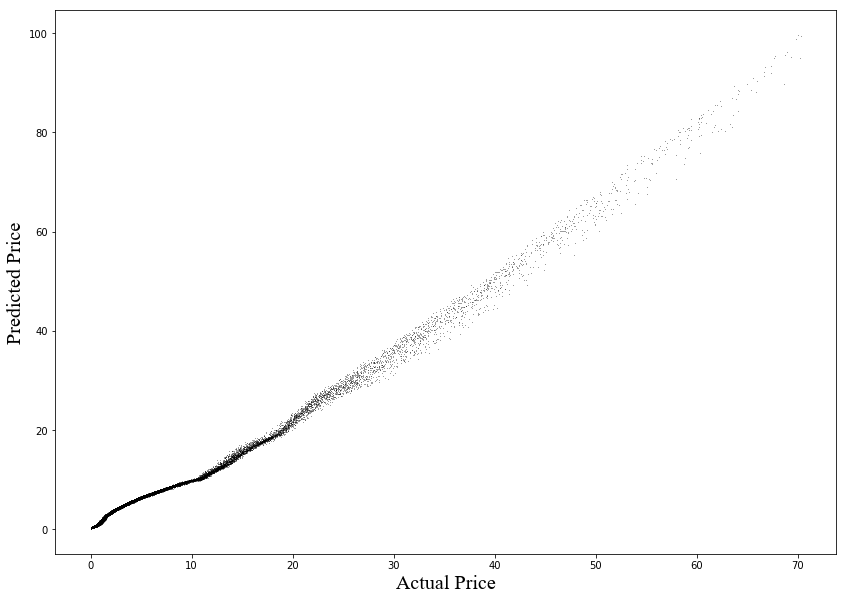

,Mean Absolute Error,Mean Percent Error,Mean Squared Error,Root Mean Squared Error
0,0.41845,0.846472,1.027918,1.013863


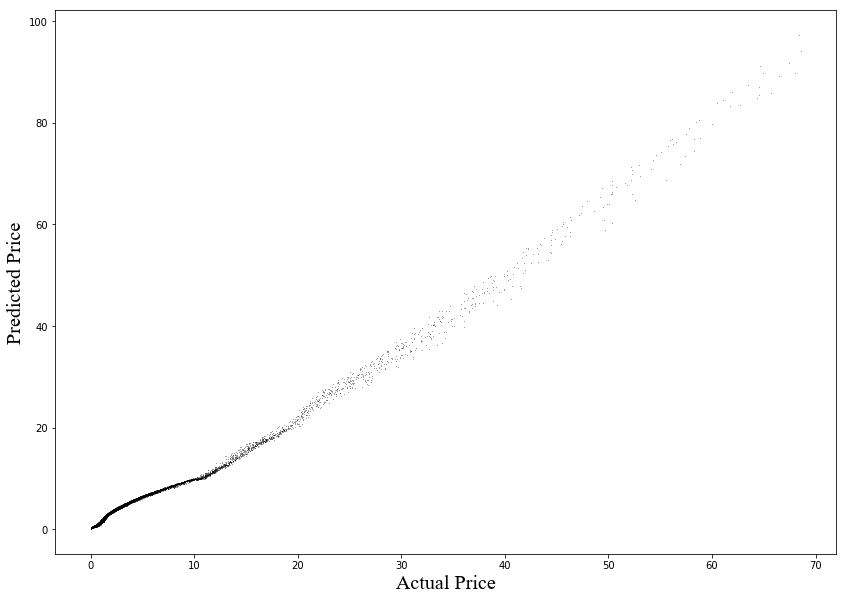

In [25]:
#Predict call option price using training data and check accuracy for in-sample
    
y_test_hat=model.predict(X_test)
y_test_hat=np.squeeze(y_test_hat)
stats,stats2=CheckAccuracy(y_train,y_train_hat,y_test, y_test_hat)

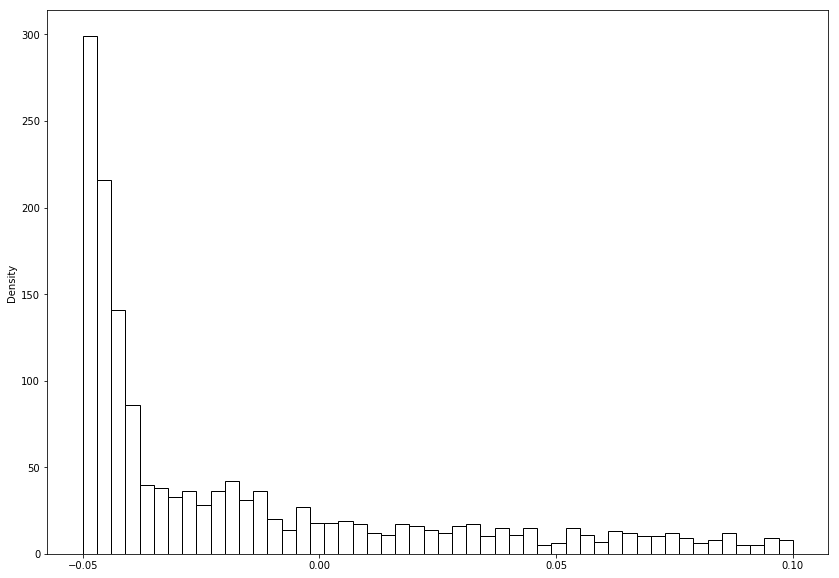

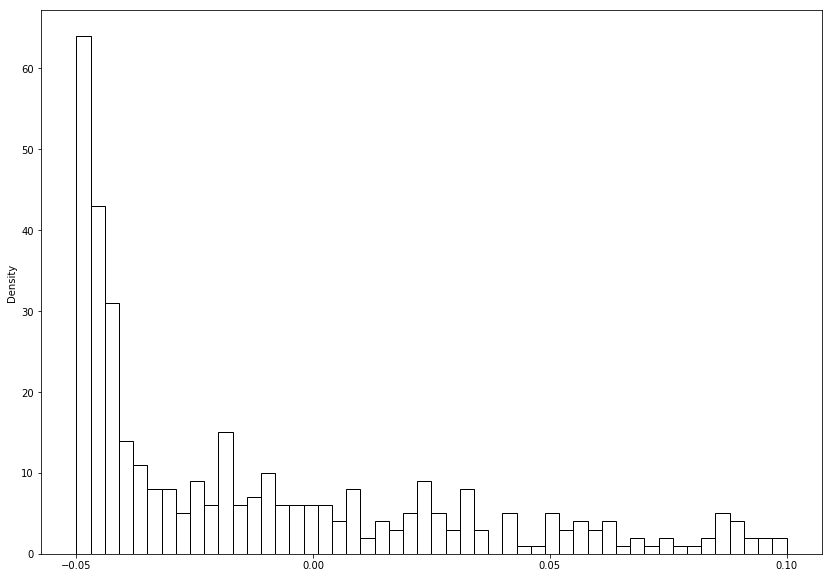

In [26]:
Plothistogram(stats,stats2)

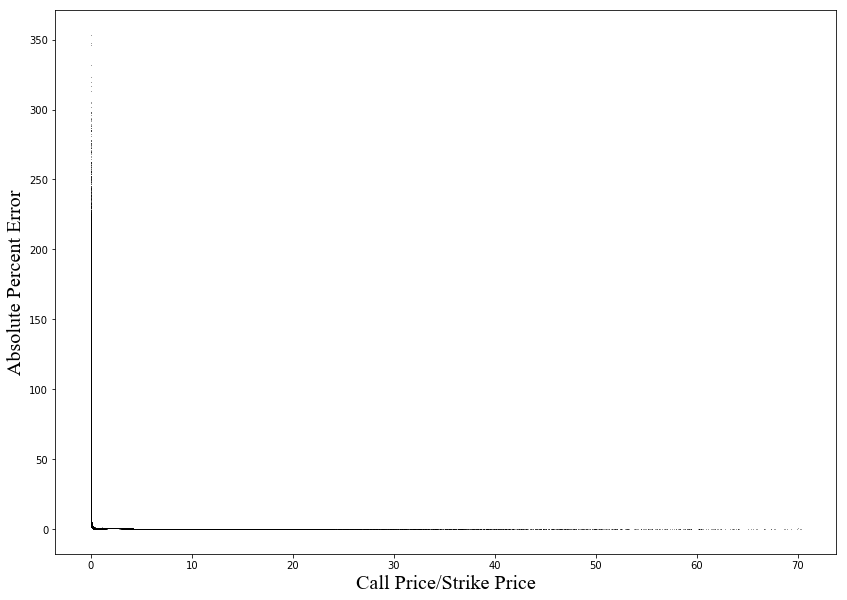

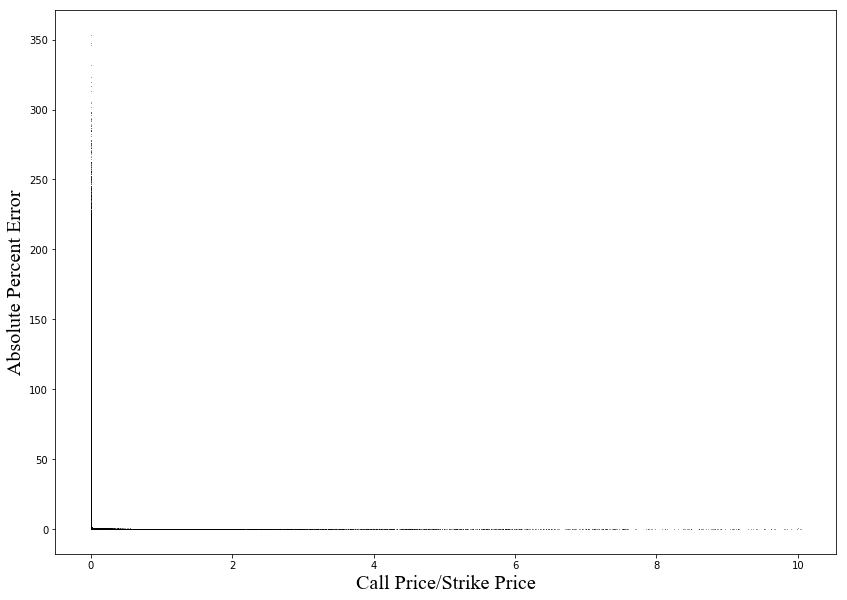

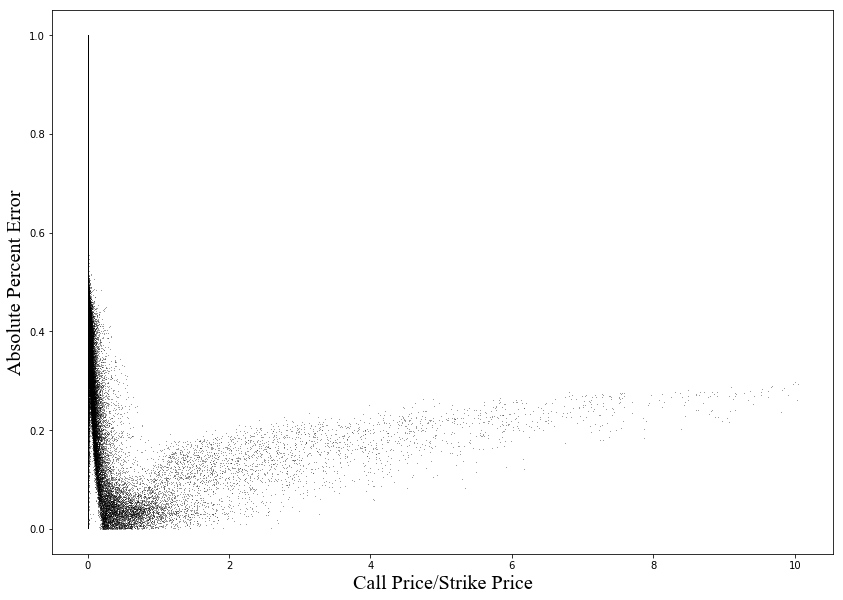

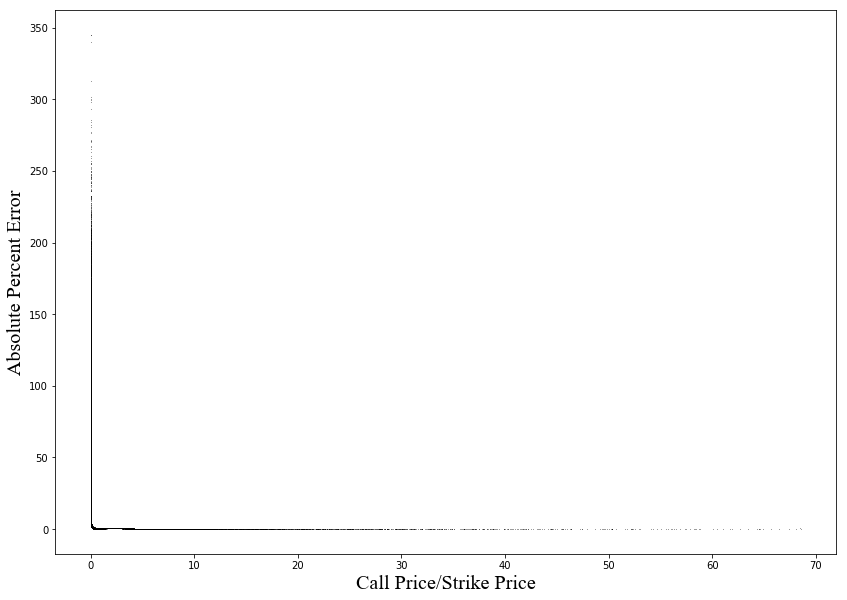

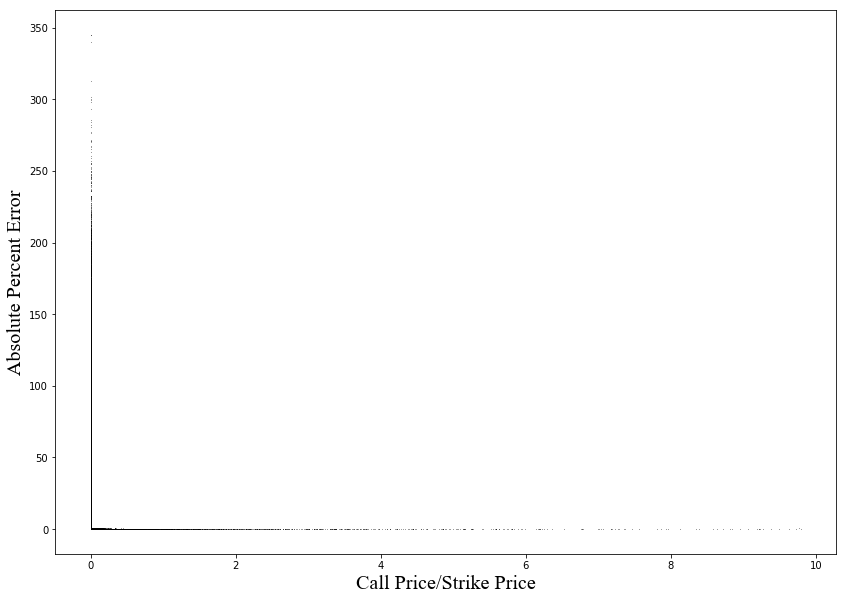

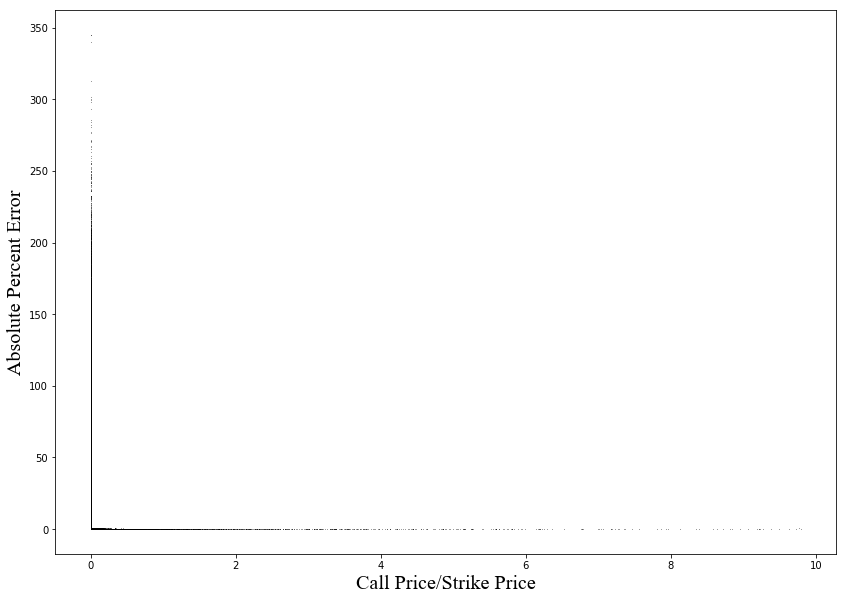

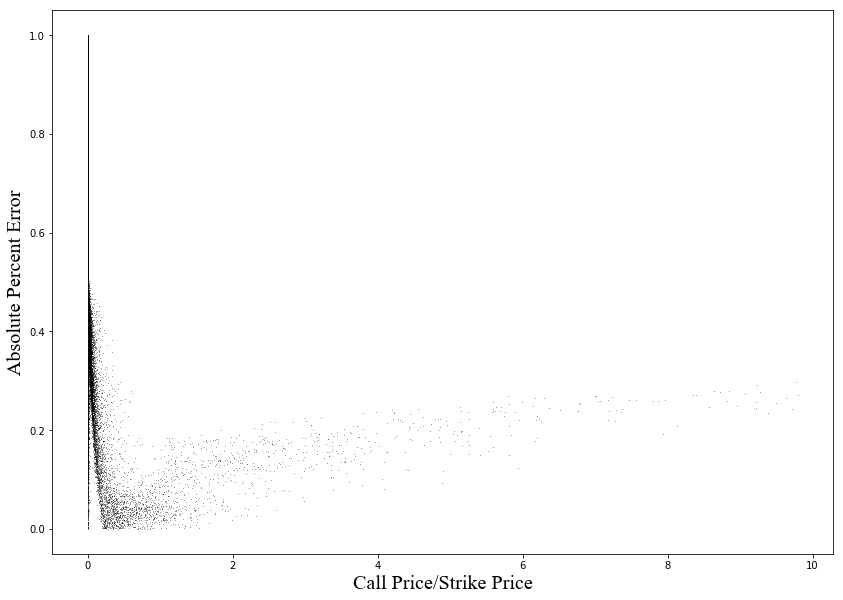

In [87]:
#Plot percent error by moneyness

#Assuming moneyness is already calculated with the normalization and based off training data prediction

y_train_cp=y_train.reshape(y_train.size,1)
error_train=stats['diff'].reshape(stats['diff'].size,1)
error_train=np.divide(np.absolute(error_train),(y_train_cp+0.001)) #added a 0.001 to account for zero values

mpl.rcParams['agg.path.chunksize']=10000
fig3=plt.figure(figsize=(14,10))

plt.scatter(y_train_cp,error_train,color='black', linewidth=0.3,alpha=0.4, s=0.5)
plt.xlabel('Call Price/Strike Price', fontsize=20, fontname='Times New Roman')
plt.ylabel('Absolute Percent Error', fontsize=20, fontname='Times New Roman')
plt.show()

#Assuming moneyness is not already calculated with the normalization and based off training data prediction

y_train_cp=y_train.reshape(y_train.size,1)
strike_price=train[' Strike_Price'].values
y_moneyness=np.divide(y_train_cp,strike_price.reshape(strike_price.size,1))
error_train=stats['diff'].reshape(stats['diff'].size,1)
error_train=np.divide(np.absolute(error_train),(y_train_cp+0.001)) #added a 0.001 to account for zero values

mpl.rcParams['agg.path.chunksize']=10000
fig4=plt.figure(figsize=(14,10))

plt.scatter(y_moneyness,error_train,color='black', linewidth=0.3,alpha=0.4, s=0.5)
plt.xlabel('Call Price/Strike Price', fontsize=20, fontname='Times New Roman')
plt.ylabel('Absolute Percent Error', fontsize=20, fontname='Times New Roman')
plt.show()

#Assuming moneyness is not already calculated with the normalization and based off training data prediction. Predicted values were used for absolute error

y_train_cp=y_train.reshape(y_train.size,1)
strike_price=train[' Strike_Price'].values
y_moneyness=np.divide(y_train_cp,strike_price.reshape(strike_price.size,1))
error_train=stats['diff'].reshape(stats['diff'].size,1)
y_train_hat=y_train_hat.reshape(y_train_hat.size,1)
error_train=np.divide(np.absolute(error_train),y_train_hat) 

mpl.rcParams['agg.path.chunksize']=10000
fig4=plt.figure(figsize=(14,10))

plt.scatter(y_moneyness,error_train,color='black', linewidth=0.3,alpha=0.4, s=0.5)
plt.xlabel('Call Price/Strike Price', fontsize=20, fontname='Times New Roman')
plt.ylabel('Absolute Percent Error', fontsize=20, fontname='Times New Roman')
plt.show()

#Assuming moneyness is already calculated with the normalization and based off test data prediction

y_test_cp=y_test.reshape(y_test.size,1)
error_test=stats2['diff'].reshape(stats2['diff'].size,1)
error_test=np.divide(np.absolute(error_test),y_test_cp+0.001) #added a 0.001 to account for zero values

mpl.rcParams['agg.path.chunksize']=10000
fig5=plt.figure(figsize=(14,10))

plt.scatter(y_test_cp,error_test,color='black', linewidth=0.3,alpha=0.4, s=0.5)
plt.xlabel('Call Price/Strike Price', fontsize=20, fontname='Times New Roman')
plt.ylabel('Absolute Percent Error', fontsize=20, fontname='Times New Roman')
plt.show()

#Assuming moneyness is not already calculated with the normalization and based off test data prediction

y_test_cp=y_test.reshape(y_test.size,1)
strike_price=test[' Strike_Price'].values
y_moneyness=np.divide(y_test_cp,strike_price.reshape(strike_price.size,1))
error_test=stats2['diff'].reshape(stats2['diff'].size,1)
error_test=np.divide(np.absolute(error_test),y_test_cp+0.001) #added a 0.001 to account for zero values

mpl.rcParams['agg.path.chunksize']=10000
fig6=plt.figure(figsize=(14,10))

plt.scatter(y_moneyness,error_test,color='black', linewidth=0.3,alpha=0.4, s=0.5)
plt.xlabel('Call Price/Strike Price', fontsize=20, fontname='Times New Roman')
plt.ylabel('Absolute Percent Error', fontsize=20, fontname='Times New Roman')
plt.show()

#Assuming moneyness is not already calculated with the normalization and based off test data prediction

y_test_cp=y_test.reshape(y_test.size,1)
strike_price=test[' Strike_Price'].values
y_moneyness=np.divide(y_test_cp,strike_price.reshape(strike_price.size,1))
error_test=stats2['diff'].reshape(stats2['diff'].size,1)
error_test=np.divide(np.absolute(error_test),y_test_cp+0.001) #added a 0.001 to account for zero values

mpl.rcParams['agg.path.chunksize']=10000
fig6=plt.figure(figsize=(14,10))

plt.scatter(y_moneyness,error_test,color='black', linewidth=0.3,alpha=0.4, s=0.5)
plt.xlabel('Call Price/Strike Price', fontsize=20, fontname='Times New Roman')
plt.ylabel('Absolute Percent Error', fontsize=20, fontname='Times New Roman')
plt.show()

#Assuming moneyness is not already calculated with the normalization and based off test data prediction. Dividing by test values

y_test_cp=y_test.reshape(y_test.size,1)
strike_price=test[' Strike_Price'].values
y_moneyness=np.divide(y_test_cp,strike_price.reshape(strike_price.size,1))
error_test=stats2['diff'].reshape(stats2['diff'].size,1)
y_test_hat=y_test_hat.reshape(y_test_hat.size,1)
error_test=np.divide(np.absolute(error_test),y_test_hat) 

mpl.rcParams['agg.path.chunksize']=10000
fig6=plt.figure(figsize=(14,10))

plt.scatter(y_moneyness,error_test,color='black', linewidth=0.3,alpha=0.4, s=0.5)
plt.xlabel('Call Price/Strike Price', fontsize=20, fontname='Times New Roman')
plt.ylabel('Absolute Percent Error', fontsize=20, fontname='Times New Roman')
plt.show()
    
    

In [88]:
#source: black-scholes deep learning by Robbie Culkin and Sanjiv Das, 1/16/2018